
# Lecture 13: Neural Networks

Adapted from Applied Machine Learning Lecture Notes of Volodymyr Kuleshov, Cornel Tech

__Instructor Tan Bui__


# Part 1: An Artifical Neuron

In this lecture, we will learn about a new class of machine learning algorithms inspired by the brain.

We will start by defining a few building blocks for these algorithms, and draw connections to neuroscience.

# Review: Components of A Supervised Machine Learning Problem

At a high level, a supervised machine learning problem has the following structure:

$$ \underbrace{\text{Training Dataset}}_\text{Attributes + Features} + \underbrace{\text{Learning Algorithm}}_\text{Model Class + Objective + Optimizer } \to \text{Predictive Model} $$

# Review: Binary Classification

In supervised learning, we fit a model of the form
$$ f : \mathcal{X} \to \mathcal{Y} $$
that maps inputs $x \in \mathcal{X}$ to targets $y \in \mathcal{Y}$.

In classification, the space of targets $\mathcal{Y}$ is *discrete*. Classification is binary if $\mathcal{Y} = \{0,1\}$

# Review: Logistic Regression

Logistic regression fits a model of the form
$$ f(x) = \sigma(\theta^\top x) = \frac{1}{1 + \exp(-\theta^\top x)}, $$
where
$$ \sigma(z) = \frac{1}{1 + \exp(-z)} $$
is known as the *sigmoid* or *logistic* function.

# A Biological Neuron

In order to define an artifical neuron, let's look first at a biological one.

<center>
<img width=60% src="img/nns/bio-neuron.png">
</center>

* Each neuron receives input signals from its dendrites
* If input signals are strong enough, neuron fires output along its axon, which connects to the dendrites of other neurons.

# An Artificial Neuron: Example

We can imitate this machinery using an idealized artifical neuron.
* Dendrite $j$ gets signal $x_j$; modulates multiplicatively to $w_j \cdot x_j$.
* The body of the neuron sums the modulated inputs: $\sum_{j=1}^d w_j \cdot x_j$.
* These go into the activation function that produces an ouput.
<center>
<img width="55%" src="img/nns/aneuron.jpeg">
</center>

# An Artificial Neuron: Notation

More formally, we say that a neuron is a model $f : \mathbb{R}^d \to [0,1]$, with the following components:
* Inputs $x_1,x_2,...,x_d$, denoted by a vector $x$.
* Weight vector $w \in \mathbb{R}^d$ that modulates input $x$ as $w^\top x$.
* An activation function $\sigma: \mathbb{R} \to \mathbb{R}$ that computes the output $\sigma(w^\top x)$ of the neuron based on the sum of modulated features $w^\top x$.

# Perceptron (McCulloch-Pitts Neuron)

If we use a step function as the activation function, we obtain the classic Perceptron model:

$$ f(x) = 
\begin{cases}
  1 & \text{if $\theta^\top x>0$}, \\
  0 & \text{otherwise}
\end{cases}
$$

This models a neuron that fires if the inputs are sufficiently large, and doesn't otherwise.

We can visualize the activation function of the Perceptron.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
z = np.linspace(-5, 5)

step_fn = lambda z: 1 if z > 0 else 0
plt.plot(z, [step_fn(zi) for zi in z])

# Logistic Regression as an Smooth Artifical Neuron

Logistic regression is a model of the form
$$ f(x) = \sigma(\theta^\top x) = \frac{1}{1 + \exp(-\theta^\top x)}, $$
that can be interpreted as a neuron that uses the *sigmoid* as the activation function.

The sigmoid activation function encodes the idea of a neuron firing if the inputs exceed a threshold, makes make the activation function "smooth".

In [ ]:
sigma = 1/(1+np.exp(-z))
plt.plot(z, sigma)

# Activation Functions

There are many other activation functions that can be used. In practice, these two work better than the sigmoid:
* Hyperbolic tangent (`tanh`): $\sigma(z) = \tanh(z)$
* Rectified linear unit (`ReLU`): $\sigma(z) = \max(0, z)$. ***Recall and compare it with the hinge loss***
<!-- * Leaky `ReLU`: $$\sigma(z) = \max(\alpha z, z),$$ where $\alpha$ is a small constant such as 0.1. -->

We can easily visualize these.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

plt.subplot(121)
plt.plot(z, np.tanh(z))
plt.subplot(122)
plt.plot(z, np.maximum(z, 0))

# Classification Dataset: Iris Flowers

To demonstrate classification algorithms, we are going to use the Iris flower dataset. 

We are going to define an artificial neuron for the binary classification problem (class-0 vs the rest).

In [ ]:
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
import numpy as np
import pandas as pd
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris(as_frame=True)
iris_X, iris_y = iris.data, iris.target

# rename class two to class one
iris_y2 = iris_y.copy()
iris_y2[iris_y2==2] = 1

X = iris_X.to_numpy()[:,:2]
Y = iris_y2

This is a visualization of the dataset.

In [ ]:
# Plot also the training points
p1 = plt.scatter(X[:,0], X[:,1], c=iris_y2, edgecolor='k', s=60, cmap=plt.cm.Paired)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(handles=p1.legend_elements()[0], labels=['Setosa', 'Non-Setosa'], loc='lower right')

Below, we define neuron with a sigmoid activation function (and its gradient).

In [ ]:
def neuron(X, theta):
    activation_fn = lambda z: 1/(1+np.exp(-z))
    return activation_fn(X.dot(theta))

def gradient(theta, X, y):
    return np.mean((y - neuron(X, theta)) * X.T, axis=1)

We can optimize is using gradient descent.

In [ ]:
threshold = 5e-5
step_size = 1e-1

iter, theta, theta_prev = 0, np.ones((3,)), 0
iris_X['one'] = 1 # add a vector of ones for the bias
X_train = iris_X.iloc[:,[0,1,-1]].to_numpy()
y_train = iris_y2.to_numpy()

while np.linalg.norm(theta - theta_prev) > threshold:
    if iter % 50000 == 0:
        print('Iteration %d.' % iter)
    theta_prev = theta
    grad = gradient(theta, X_train, y_train)
    theta = theta_prev + step_size * grad
    iter += 1

This neuron learns a linear decision boundary that separates the data.

In [ ]:
# generate predictions over a grid:
xx, yy = np.meshgrid(np.arange(3.3, 8.9, 0.02), np.arange(1.0, 5.4, 0.02))
Z = neuron(np.c_[xx.ravel(), yy.ravel(), np.ones(xx.ravel().shape)], theta)
Z[Z<0.5] = 0
Z[Z>=0.5] = 1

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

# Algorithm: Artificial Neuron

* __Type__: Supervised learning (regression and classification).
* __Model family__: Linear model followed by non-linear activation.
* __Objective function__: Any differentiable objective.
* __Optimizer__: Gradient descent.
* __Special Cases__: Logistic regression, Perceptron


# Part 2: Artificial Neural Networks

Let's now see how we can connect neurons into networks that form complex models that further mimic the brain.

# Review: Artificial Neuron

We say that a neuron is a model $f : \mathbb{R}^d \to [0,1]$, with the following components:
* Inputs $x_1,x_2,...,x_d$, denoted by a vector $x$.
* Weight vector $w \in \mathbb{R}^d$ that modulates input $x$ as $w^\top x$.
* An activation function $\sigma: \mathbb{R} \to \mathbb{R}$ that computes the output $\sigma(w^\top x)$ of the neuron based on the sum of modulated features $w^\top x$.

# Review: Logistic Regression as a smoonth artificial Neuron

Logistic regression is a model of the form
$$ f(x) = \sigma(\theta^\top x) = \frac{1}{1 + \exp(-\theta^\top x)}, $$
that can be interpreted as a neuron that uses the *sigmoid* as the activation function.

# Neural Networks: Intuition

A neural network is a directed graph in which a node is a neuron that takes as input the outputs of the neurons that are connected to it.
<center>
<img src="img/nns/net-intro.png">
</center>
Networks are typically organized in layers.

# Neural Networks: Layers

A neural network layer is a model $f : \mathbb{R}^d \to \mathbb{R}^p$ that applies $p$ neurons in parallel to an input $x$.
$$ f(x) = \begin{bmatrix}
\sigma(w_1^\top x) \\
\sigma(w_2^\top x) \\
\vdots \\
\sigma(w_p^\top x)
\end{bmatrix}.
$$
where each $w_k$ is the vector of weights for the $k$-th neuron. **We refer to $p$ as the *size* of the layer.**

The first output of the layer is a neuron with weights $w_1$:
<center>
<img src="img/nns/layers-1.png" width=60%>
</center>    

The second neuron has weights $w_2$:
<center>
<img src="img/nns/layers-2.png" width=60%>
</center>    

The third neuron has weights $w_3$:
<center>
<img src="img/nns/layers-3.png" width=60%>
</center>    

The parameters of the layer are $w_1, w_2, w_3$.

By combining the $w_k$ into one matrix $W$ whose $k$-th column is $w_k$, we can write in a more succinct vectorized form:
$$f(x) = \sigma(W\cdot x) = \begin{bmatrix}
\sigma(w_1^\top x) \\
\sigma(w_2^\top x) \\
\vdots \\
\sigma(w_p^\top x)
\end{bmatrix},
$$
where $\sigma(W\cdot x)_k = \sigma(w_k^\top x)$ and $W_{kj} = (w_k)_j$.

Visually, we can represent this as follows:
<center>
<img src="img/nns/layers-4.png" width=60%>
</center>    

# Neural Networks: Notation

A neural network is a model $f : \mathbb{R}^d \to \mathbb{R}$ that consists of a composition of **$L$ neural network layers**:
$$ f(x) = f_L \circ f_{L-1} \circ \ldots f_l \circ \ldots f_1 (x). $$
The final layer $f_L$ has size one (assuming the neural net has one ouput); intermediary layers $f_l$ can have any number of neurons.

The notation $f \circ g(x)$ denotes the composition $f(g(x))$ of functions.

We can visualize this graphically as follows.

<center>
<img src="img/nns/layers-L.png" width=100%>
</center>    

# Example of a Neural Network

Let's implement a small two layer neural net with 3 hidden units.

<center>
<img src="img/nns/nn-example.png" width=60%>
</center>    

This implementation looks as follows.

In [ ]:
# a two layer network with logistic function as activation
class Net():
    def __init__(self, x_dim, W_dim):
        # weight matrix for layer 1
        self.W = np.random.normal(size=(x_dim, W_dim))
        # weight matrix for layer 2, also the output layer
        self.V = np.random.normal(size=(W_dim, 1))
        # activation function
        self.afunc = lambda x: 1/(1+np.exp(-x))
    
    def predict(self, x):
        # get output of the first layer
        l1 = self.afunc(np.matmul(x, self.W))
        # get output of the second layer, also the output layer
        out = self.afunc(np.matmul(l1, self.V))
        return out

Later in this lecture, we will see how to train this model using gradient descent.

# Types of Neural Network Layers

There are many types of neural network layers that can exist. Here are a few:
* **Ouput layer**: normally has one neuron and special activation function that depends on the problem
* **Input layer**: normally, this is just the input vector $x$.
* **Hidden layer**: Any layer between input and output.

* **Dense layer**: A layer in which every input is connected to every neuron.
* **Convolutional layer**: A layer in which the operation $w^\top x$ implements a mathematical [convolution](https://en.wikipedia.org/wiki/Convolution).
* **Recurrent Layer**: A layer in which a neuron's output is connected back to the input.

# Algorithm: (Fully-Connected) Neural Network

* __Type__: Supervised learning (regression and classification).
* __Model family__: Compositions of layers of artificial neurons.
* __Objective function__: Any differentiable objective.
* __Optimizer__: Gradient descent.

# Pros and Cons of Neural Nets

Neural networks are very powerful models.
* They are flexible, and can approximate any function.
* They work well over unstructured inputs like audio or images.
* They can achieve state-of-the-art perfomrance.

They also have important drawbacks.
* They can also be slow and hard to train.
* Large neworks require a lot of data.


# Part 3: Backpropagation to compute the gradient of a neural network

We have defined what is an artificial neural network.

Let's now see how we can train it so that it performs well on given tasks.

# Review: Neural Network Layers

A neural network layer is a model $f : \mathbb{R}^d \to \mathbb{R}^p$ that applies $p$ neurons in parallel to an input $x$.
$$f(x) = \sigma(W\cdot x) = \begin{bmatrix}
\sigma(w_1^\top x) \\
\sigma(w_2^\top x) \\
\vdots \\
\sigma(w_p^\top x)
\end{bmatrix},
$$
where each $w_k$ is the vector of weights for the $k$-th neuron and $W_{kj} = (w_k)_j$. We refer to $p$ as the *size* of the layer.

# Review: Neural Networks

A neural network is a model $f : \mathbb{R} \to \mathbb{R}$ that consists of a composition of $L$ neural network layers:
$$ f(x) = f_L \circ f_{L-1} \circ \ldots f_1 (x). $$
The final layer $f_L$ has size one (assuming the neural net has one ouput); intermediary layers $f_l$ can have any number of neurons.

The notation $f \circ g(x)$ denotes the composition $f(g(x))$ of functions

We can visualize this graphically as follows.

<img src="img/nns/layers-L.png" width=100%>

# Review: The Gradient

The gradient $\nabla_\theta f$ further extends the derivative to multivariate functions $f : \mathbb{R}^d \to \mathbb{R}$, and is defined at a point $\theta$ as
$$ \nabla_\theta f (\theta) = \begin{bmatrix}
\frac{\partial f(\theta)}{\partial \theta_1} \\
\frac{\partial f(\theta)}{\partial \theta_2} \\
\vdots \\
\frac{\partial f(\theta)}{\partial \theta_d}
\end{bmatrix}.$$
In other words, the $j$-th entry of the vector $\nabla_\theta f (\theta)$ is the partial derivative $\frac{\partial f(\theta)}{\partial \theta_j}$ of $f$ with respect to the $j$-th component of $\theta$.

# Review: Gradient Descent

If we want to optimize an objective $J(\theta)$, we start with an initial guess $\theta_0$ for the parameters and repeat the following update until the function is no longer decreasing:
$$ \theta^i := \theta^{i-1} - \alpha \cdot \nabla_\theta J(\theta^{i-1}). $$

As code, this method may look as follows:
```python
theta, theta_prev = random_initialization()
while norm(theta - theta_prev) > convergence_threshold:
    theta_prev = theta
    theta = theta_prev - step_size * gradient(theta_prev)
```

# Backpropagation

To apply gradient descent, we need to calculate gradients for every parameter in a neural network model $f$:
$$\frac{\partial J}{\partial \theta_0}, \frac{\partial J}{\partial \theta_1}, \cdots, \frac{\partial J}{\partial \theta_d}$$

It might be possible to do it manually when the network is small. But it is nearly impossible and very much error-prone to compute gradients for larger networks.

***Backpropagation is a way of calculating gradients efficiently for neural network models with arbitrary number of layers and neurons.***

The core idea of it is something we are actually very familiar with: the chain rule.

# Review: Chain Rule of Calculus

If we have two differentiable functions $f(x)$ and $g(x)$, and $$F(x) = f \circ g (x)$$ then the derivative of $F(x)$ is:
$$ F^\prime (x) = f^\prime (g(x)) \cdot g^\prime (x).$$

Let $y=f(u)$ and $u=g(x)$, we also have:
$$ \frac{dy}{dx} = \frac{dy}{du} \frac{du}{dx}.$$

# Chain Rule in Neural Nets

A neural network is a model $f : \mathbb{R} \to \mathbb{R}$ that consists of a composition of $L$ neural network layers:
$$ f(x) = f_L \circ f_{L-1} \circ \ldots f_1 (x). $$

Let $y_l$ denote the output $f_l \circ f_{-1} \circ f_1(x)$ of layer $l$.

The chain rule tells us to compute $\frac{\partial J}{\partial \theta_l}$ for all parameters $\theta_l$ in layer $l$. We can break the computation down as:
$$ \frac{\partial J}{\partial \theta_l} = \frac{\partial J}{\partial y_L} \frac{\partial y_L}{\partial y_{L-1}} \cdots \frac{\partial y_{l+1}}{\partial y_l} \frac{\partial y_l}{\partial \theta_l}, $$
where $y_L, y_{L-1} \cdots y_l$ are the outputs from each layer.

Note that the computation of $\frac{\partial J}{\partial y_l}$ can be re-used for computing gradients for all $\theta$ in layers before $l$. 

***

In other words, if we know

1. $\frac{\partial J}{\partial y_l}$, and 
2. $\frac{\partial y_l}{\partial \theta_l}$

then we can compute $\frac{\partial J}{\partial \theta_l} = \frac{\partial J}{\partial y_l} \times \frac{\partial y_l}{\partial \theta_l}$.

***

This is the key idea of backpropagation: local gradients computation for each layer can be 'chained' to obtain gradients.

### Illustration:

Let's start with a single layer $y = f(x;\theta)$:

<center>
<img width="800px" src="img/nns/backprop/backprop-abstract-figure0.png">
</center>

With the output $y$, target label $\hat{y}$, and loss function $J$, we can compute the loss (error) of the prediction.

<center>
<img width="800" src="img/nns/backprop/backprop-abstract-figure1.png">
</center>

The backpropagation starts from the output layer and moves backwards.

We first need to compute the gradients of the loss to the output.

<center>
<img width="800" src="img/nns/backprop/backprop-abstract-figure2.png">
</center>

After we have those, then using the chain rule, we can  compute the gradients with respect to the network parameters $\theta$.

<center>
<img width="800" src="img/nns/backprop/backprop-abstract-figure3.png">
</center>

We can keep working upstream and compute gradients to the input. After that we finish the backpropagation in this layer.

<center>
<img width="800" src="img/nns/backprop/backprop-abstract-figure4.png">
</center>

As you can see, this operation can be easily extended to more layers between the input and output.

<center>
<img width="900" src="img/nns/backprop/backprop-abstract-figure5.png">
</center>

We can apply this process recursively to obtain derivatives for any number of layers.

<center>
<img width="900" src="img/nns/backprop/backprop-abstract-figure6.png">
</center>

# Backprogragation by Hand

Let's work out by hand what backpropagation would do on our two layer neural network.

<center>
<img width="450" src="img/nns/backprop/backprop-twolayers-figure0.png">
</center>    

For our two layer fully connected network with sigmoid activation, the network is composed of following functions:

$$\mathbf{h} = \sigma(\mathbf{W}^T \mathbf{x})$$
$$y = \sigma(\mathbf{V}^T \mathbf{h}),$$

where $\mathbf{x} = [x_1,x_2]^T, \mathbf{h} = [h_1,h_2,h_3]^T, \mathbf{W} \in \mathbb{R}^{2\times3}, \mathbf{V} \in \mathbb{R}^{3\times1}$, and $\sigma$ is the sigmoid function.

In our example, we have the following values:

$\mathbf{x} = [5.0,3.0]^T,~~~~\hat{y} = 1$ means it is positive class.

$\mathbf{W} = \begin{bmatrix}
1.0 & -1.0 & 3.0\\ 
2.0 & 2.0 & -1.0
\end{bmatrix}$

$\mathbf{V} = [0.1,0.5,-0.1]^T$

<center>
<img width="700" src="img/nns/backprop/backprop-twolayers-figure1.png">
</center>
We can compute the output of the hidden layer, $\mathbf{h}$:

$h_1 = \sigma (W_{11} \cdot x_1 + W_{21} \cdot x_2) = \sigma (1.0\times5.0 + 2.0\times3.0) = 0.99998329857$

<center>
<img width="700" src="img/nns/backprop/backprop-twolayers-figure2.png">
</center>
We can compute the output of the hidden layer, $\mathbf{h}$:

\begin{align*}
h_1 &= \sigma (W_{11} \cdot x_1 + W_{21} \cdot x_2) = \sigma (1.0\times5.0 + 2.0\times3.0) = 0.9999 \\
h_2 &= \sigma (W_{12} \cdot x_1 + W_{22} \cdot x_2) = \sigma (-1.0\times5.0 + 2.0\times3.0) = 0.7310
\end{align*}

<center>
<img width="700" src="img/nns/backprop/backprop-twolayers-figure3.png">
</center>    
We can compute the output of the hidden layer, $\mathbf{h}$:

\begin{align*}
h_1 &= \sigma (W_{11} \cdot x_1 + W_{21} \cdot x_2) = \sigma (1.0\times5.0 + 2.0\times3.0) = 0.9999 \\
h_2 &= \sigma (W_{12} \cdot x_1 + W_{22} \cdot x_2) = \sigma (-1.0\times5.0 + 2.0\times3.0) = 0.7310 \\
h_3 &= \sigma (W_{13} \cdot x_1 + W_{23} \cdot x_2) = \sigma (3.0\times5.0 + -1.0\times3.0) = 0.9999
\end{align*}

<center>
<img width="800" src="img/nns/backprop/backprop-twolayers-figure4.png">
</center>
Similarly we can get the output of $y$:

$y = \sigma (V_1 \cdot h_1 + V_2 \cdot h_2 + V_3 \cdot h_3) = 0.590378$

<center>
<img width="700" src="img/nns/backprop/backprop-twolayers-figure5.png">
</center>
Next, we compute the binary cross entropy loss with the target label  $1$ :

$J(y, \hat{y}) = - \log (y) = 0.52699$

We can also compute the gradient (shown in red):
$\frac{\mathrm{d}J}{\mathrm{d}{y}} = - 1/y = -1.69383$

We are now ready to kick start the backpropagation steps.

<center>
<img width="700" src="img/nns/backprop/backprop-twolayers-figure5.png">
</center>

We are going to compute the gradients to the weights in the output layer:

$$\frac{\mathrm{d}J}{\mathrm{d}{V}} = \frac{\mathrm{d}J}{\mathrm{d}{y}} \frac{\mathrm{d}y}{\mathrm{d}{V}}$$

Recall $y = \sigma(\mathbf{V}^T \mathbf{h}) = \sigma (V_1 \cdot h_1 + V_2 \cdot h_2 + V_3 \cdot h_3)$ and $\sigma' = \sigma(1-\sigma)$:

$$\frac{\partial y}{\partial V_1} = y (1-y) h_1,~~\frac{\partial y}{\partial V_2} = y (1-y) h_2,~~\frac{\partial y}{\partial V_3} = y (1-y) h_3$$

<center>
<img width="700" src="img/nns/backprop/backprop-twolayers-figure6.png">
</center>

Applying these formulas, we obtain the gradients of $\mathbf{V}$:

\begin{align*}
\frac{\partial J}{\partial V_1} &= \frac{\mathrm{d}J}{\mathrm{d}{y}} \frac{\partial y}{\partial V_1} = -1.69 \times 0.59 \times (1-0.59) \times 0.99998 = -0.41\\
\frac{\partial J}{\partial V_2} &= \frac{\mathrm{d}J}{\mathrm{d}{y}} \frac{\partial y}{\partial V_2} = -1.69 \times 0.59 \times (1-
0.59) \times 0.7311 = -0.30\\
\frac{\partial J}{\partial V_3} &= \frac{\mathrm{d}J}{\mathrm{d}{y}} \frac{\partial y}{\partial V_3} = -1.69 \times 0.59 \times (1-0.59) \times 0.99999 = -0.41
\end{align*}

<center>
<img width="700" src="img/nns/backprop/backprop-twolayers-figure6.png">
</center>

Next, we want to compute gradients at the hidden layer:

$$\frac{\mathrm{d}J}{\mathrm{d}{h}} = \frac{\mathrm{d}J}{\mathrm{d}{y}} \frac{\mathrm{d}y}{\mathrm{d}{h}}$$

<center>
<img width="600" src="img/nns/backprop/backprop-twolayers-figure7.png">
</center>

Similarly to the previous slide:
\begin{align*}
\frac{\partial J}{\partial h_1} &= \frac{\mathrm{d}J}{\mathrm{d}{y}} \frac{\partial y}{\partial h_1} = -1.69 \times 0.59 \times (1-0.59) \times 0.1 = -0.04096\\
\frac{\partial J}{\partial h_2} &= \frac{\mathrm{d}J}{\mathrm{d}{y}} \frac{\partial y}{\partial h_2} = -1.69 \times 0.59 \times (1-
0.59) \times 0.5 = -0.2048\\
\frac{\partial J}{\partial h_3} &= \frac{\mathrm{d}J}{\mathrm{d}{y}} \frac{\partial y}{\partial h_3} = -1.69 \times 0.59 \times (1-0.59) \times -0.1 = 0.04096
\end{align*}
<!-- From now on we can ignore the output layer, as we have everything we need to compute gradients in layers ahead. -->

<center>
<img width="600" src="img/nns/backprop/backprop-twolayers-figure8.png">
</center>
Since we have another linear layer with sigmoid activation, the way we compute gradients will be the same as in the output layer.

\begin{align*}
\frac{\partial J}{\partial h_1} \frac{\partial h_1}{\partial W_{11}} &= -0.041 \times 0.99998 \times (1-0.99998) \times 5 = -3\times10^{-6} \\
\frac{\mathrm{d}J}{\mathrm{d}{h_1}} \frac{\partial h_1}{\partial W_{12}} &= -0.041 \times 0.99998 \times (1-
0.99998) \times 3 = -2\times10^{-6}
\end{align*}

<center>
<img width="700" src="img/nns/backprop/backprop-twolayers-figure9.png">
</center>
We can compute the rest the same way.

Note the gradients to the weights connecting to $h_2$ are larger in magnitude than others. 

<center>
<img width="700" src="img/nns/backprop/backprop-twolayers-figure10.png">
</center>

And now we have the gradients to all the learnable weights in this two layer network and we can tune the weights by gradient descenet.

The gradients tell us how much to change for each weight so that the loss will become smaller. 

Now let's implement backprop with the simple neural network model we defined earlier.

We start by implementing the building block of our network: a linear layer with sigmoid activation.

In [ ]:
import numpy as np

# a single linear layer with sigmoid activation
class LinearSigmoidLayer():
    def __init__(self, in_dim, out_dim):
        self.W = np.random.normal(size=(in_dim,out_dim))
        self.W_grad = np.zeros_like(self.W)
        
        self.afunc = lambda x: 1. / (1. + np.exp(-x))
    
    # forward function to get output
    def forward(self, x):
        Wx = np.matmul(x, self.W)
        self.y = self.afunc(Wx)
        self.x = x
        return self.y        
        
    # backward function to compute gradients
    def backward(self, grad_out):  
        self.W_grad = np.matmul(
            self.x.transpose(), 
            self.y * (1-self.y) * grad_out,
            )
        grad_in = np.matmul(
            self.y * (1-self.y) * grad_out,
            self.W.transpose()
            )
        
        return grad_in

Then we can stack the single layers to construct a two layer network.

In [ ]:
# a two layer network with logistic function as activation
class Net():
    def __init__(self, x_dim, W_dim):
        self.l1 = LinearSigmoidLayer(x_dim, W_dim)
        self.l2 = LinearSigmoidLayer(W_dim, 1)
    
    # get output
    def predict(self, x):
        h = self.l1.forward(x)
        self.y = self.l2.forward(h)
        return self.y
    
    # backprop
    def backward(self, label):
        # binary cross entropy loss, and gradients
        if label == 1:
            J = -1*np.log(self.y)
            dJ = -1/self.y
        else:
            J = -1*np.log(1-self.y)
            dJ = 1/(1-self.y)
            
        # back propagation
        dJdh = self.l2.backward(dJ) # output --> hidden
        dJdx = self.l1.backward(dJdh) # hidden --> input
        return J
    
    # update weights according to gradients
    def grad_step(self, lr=1e-4):
        self.l1.W -= lr*self.l1.W_grad
        self.l2.W -= lr*self.l2.W_grad     

We can run with our previous example to check if the results are consistent with our manual computation.

In [ ]:
model = Net(2, 3)
model.l1.W = np.array([[1.0,-1.0,3.0],[2.0,2.0,-1.0]])
model.l2.W = np.array([[0.1],[0.5],[-0.1]])

x = np.array([5.0, 3.0])[np.newaxis,...]
x_label = 1

# forward
out = model.predict(x)

# backward
loss = model.backward(label=x_label)

print('loss: {}'.format(loss))
print('W grad: {}'.format(model.l1.W_grad))
print('V grad: {}'.format(model.l2.W_grad))

In [ ]:
print(np.linalg.norm(model.l1.W_grad))
print(np.linalg.norm(model.l2.W_grad))

Another sanity check is to perform gradient descent on the single sample input and see if we can achieve close to zero loss.

You can try to change the target label below to see the network is able to adapt in either case.

In [ ]:
## gradient descent
loss = []
score = []
for i in range(100):
    out = model.predict(x)
    loss.append(model.backward(label=1)) # 1 for positive, 0 for negative
    model.grad_step(lr=1e-1)
    score.append(out)
    
import matplotlib.pyplot as plt
plt.plot(np.array(loss).squeeze(),'-')
plt.plot(np.array(score).squeeze(),'.')

# Summary

* Neural networks are powerful models that can approximate any function.
* They are trained using gradient descent.
* In order to compute gradients, we use an efficient algorithm called backpropagation.

In [1]:
import numpy as np

# a single linear layer with sigmoid activation
class LinearSigmoidLayer():
    def __init__(self, in_dim, out_dim):
        self.W = np.random.normal(size=(in_dim,out_dim))
        self.W_grad = np.zeros_like(self.W)
        
        self.afunc = lambda x: 1. / (1. + np.exp(-x))
    
    # forward function to get output
    def forward(self, x):
        Wx = np.matmul(x, self.W)
        self.y = self.afunc(Wx)
        self.x = x
        return self.y        
        
    # backward function to compute gradients
    def backward(self, grad_out):  
        self.W_grad = np.matmul(
            self.x.transpose(), 
            self.y * (1-self.y) * grad_out,
            )
        
        grad_in = np.matmul(
            self.y * (1-self.y) * grad_out,
            self.W.transpose()
            )
        
        return grad_in
    
# a two layer network with logistic function as activation
class Net():
    def __init__(self, x_dim, W_dim):
        self.l1 = LinearSigmoidLayer(x_dim, W_dim)
        self.l3 = LinearSigmoidLayer(W_dim, W_dim)
        self.l4 = LinearSigmoidLayer(W_dim, W_dim)
        self.l5 = LinearSigmoidLayer(W_dim, W_dim)
        self.l6 = LinearSigmoidLayer(W_dim, W_dim)
        self.l7 = LinearSigmoidLayer(W_dim, W_dim)
        self.l8 = LinearSigmoidLayer(W_dim, W_dim)
        self.l9 = LinearSigmoidLayer(W_dim, W_dim)
        self.l10 = LinearSigmoidLayer(W_dim, W_dim)
        self.l2 = LinearSigmoidLayer(W_dim, 1)
    
    # get output
    def predict(self, x):
        h = self.l1.forward(x)
        h = self.l3.forward(h)
        h = self.l4.forward(h)
        h = self.l5.forward(h)
        h = self.l6.forward(h)
        h = self.l7.forward(h)
        h = self.l8.forward(h)
        h = self.l9.forward(h)
        h = self.l10.forward(h)
        self.y = self.l2.forward(h)
        return self.y
    
    # backprop
    def backward(self, label):
        # binary cross entropy loss, and gradients
        if label == 1:
            J = -1*np.log(self.y)
            dJ = -1/self.y
        else:
            J = -1*np.log(1-self.y)
            dJ = 1/(1-self.y)
            
        # back propagation
        dJdh = self.l2.backward(dJ) # output --> hidden
        dJdh = self.l3.backward(dJdh) # hidden --> inpu
        dJdh = self.l4.backward(dJdh) # hidden --> inpu
        dJdh = self.l5.backward(dJdh) # hidden --> inpu
        dJdh = self.l6.backward(dJdh) # hidden --> inpu
        dJdh = self.l7.backward(dJdh) # hidden --> inpu
        dJdh = self.l8.backward(dJdh) # hidden --> inpu
        dJdh = self.l9.backward(dJdh) # hidden --> inpu
        dJdh = self.l10.backward(dJdh) # hidden --> inpu
        dJdx = self.l1.backward(dJdh) # hidden --> input
        return J
    
    # update weights according to gradients
    def grad_step(self, lr=1e-4):
        self.l1.W -= lr*self.l1.W_grad
        self.l3.W -= lr*self.l3.W_grad
        self.l4.W -= lr*self.l4.W_grad
        self.l5.W -= lr*self.l5.W_grad
        self.l6.W -= lr*self.l6.W_grad
        self.l7.W -= lr*self.l7.W_grad
        self.l8.W -= lr*self.l8.W_grad
        self.l9.W -= lr*self.l9.W_grad
        self.l10.W -= lr*self.l10.W_grad
        self.l2.W -= lr*self.l2.W_grad     

In [2]:
model = Net(2, 20)
x = np.array([5.0, 3.0])[np.newaxis,...]
x_label = 1


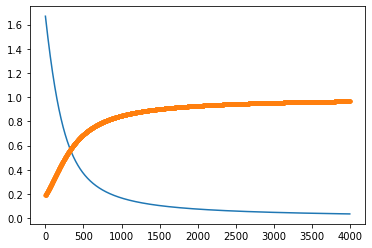

In [3]:
## gradient descent
loss = []
score = []
Num_epoches = 4000
Matrix = np.zeros((Num_epoches, 10))

for i in range(Num_epoches):
    out = model.predict(x)
    loss.append(model.backward(label=1)) # 1 for positive, 0 for negative
    model.grad_step(lr=1e-3)
    score.append(out)
    Matrix[i, :] = [np.linalg.norm(model.l1.W_grad), np.linalg.norm(model.l3.W_grad), np.linalg.norm(model.l4.W_grad), np.linalg.norm(model.l5.W_grad), np.linalg.norm(model.l6.W_grad), np.linalg.norm(model.l7.W_grad), np.linalg.norm(model.l8.W_grad), np.linalg.norm(model.l9.W_grad), np.linalg.norm(model.l10.W_grad), np.linalg.norm(model.l2.W_grad)]
    # print(np.linalg.norm(model.l1.W_grad), np.linalg.norm(model.l3.W_grad), np.linalg.norm(model.l4.W_grad), np.linalg.norm(model.l5.W_grad), np.linalg.norm(model.l6.W_grad), np.linalg.norm(model.l7.W_grad), np.linalg.norm(model.l8.W_grad), np.linalg.norm(model.l9.W_grad), np.linalg.norm(model.l10.W_grad), np.linalg.norm(model.l2.W_grad))
    
import matplotlib.pyplot as plt
plt.plot(np.array(loss).squeeze(),'-')
plt.plot(np.array(score).squeeze(),'.')

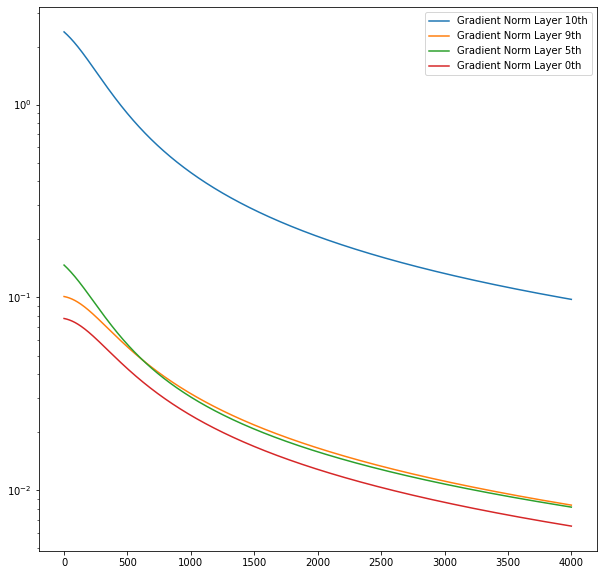

In [4]:
plt.figure(figsize=(10,10))

plt.plot(Matrix[:,-1],label = 'Gradient Norm Layer 10th')
plt.plot(Matrix[:,-2],label = 'Gradient Norm Layer 9th')
plt.plot(Matrix[:,5],label = 'Gradient Norm Layer 5th')
plt.plot(Matrix[:,0],label = 'Gradient Norm Layer 0th')
plt.legend()
plt.yscale('log')